# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [1]:
%pip install regressors

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [3]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

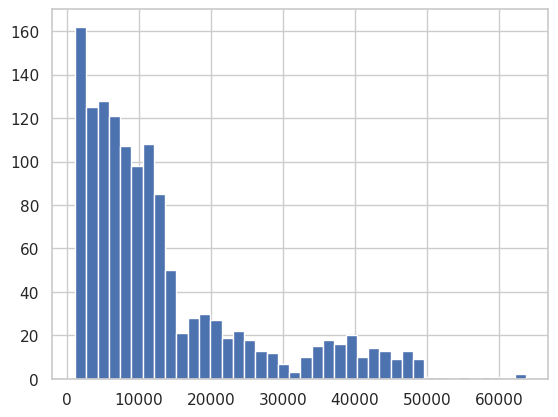

In [4]:
print(df.shape)
df.charges.hist(bins=40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [5]:
df[df.charges > 50000]
df = df[df.charges < 50000]

En este caso, al ser pocos datos (7 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/edwlearn/anaconda3/envs/algebra/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

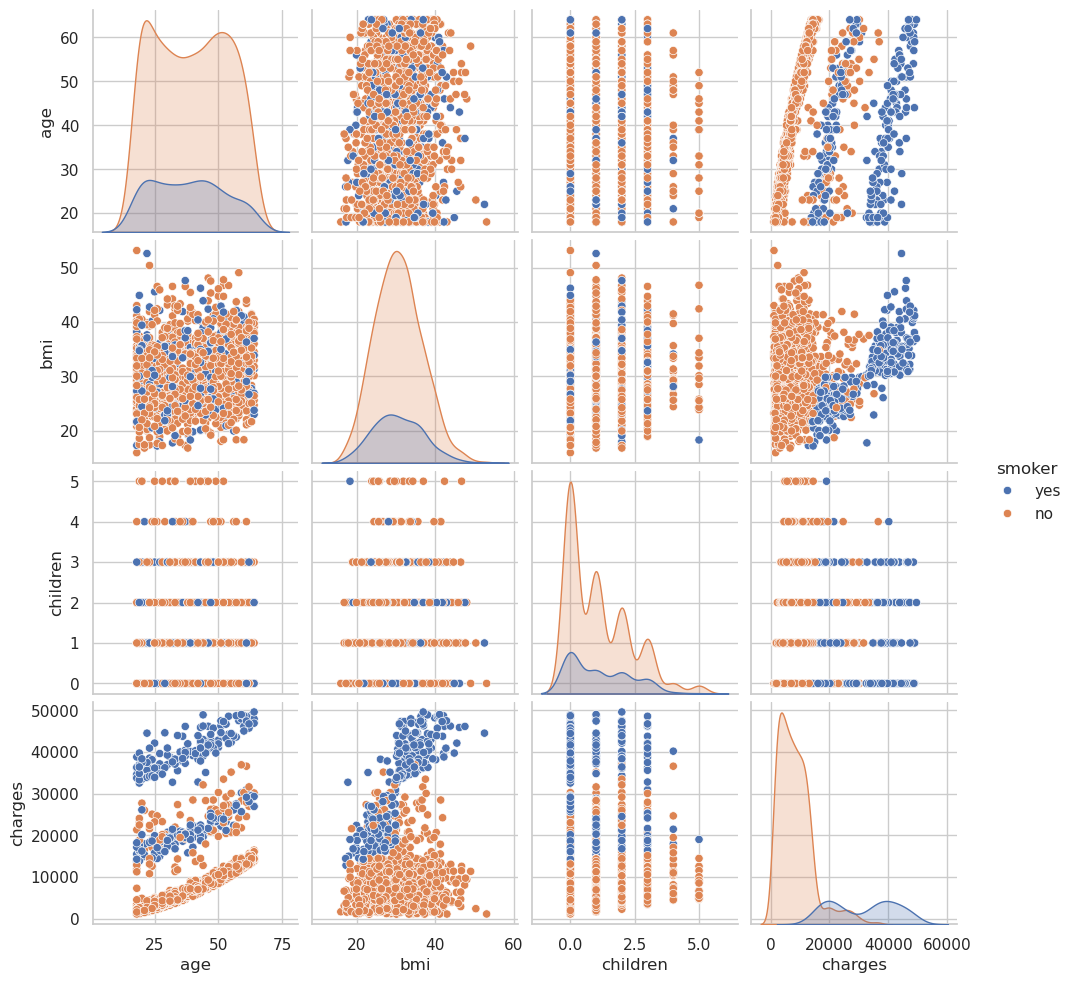

In [6]:
import matplotlib.pyplot as plt

sns.pairplot(df, height=2.5, hue='smoker')
plt.show()


Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<Axes: >

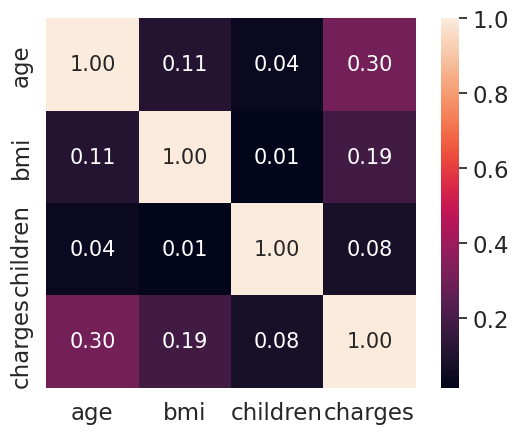

In [7]:
import numpy as np

numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=numeric_cols, xticklabels=numeric_cols)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [8]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [9]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Creando modelos 
Primero se usará un modelo con todas las variables.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X_cols = list(set(df.columns) - set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

x_train, x_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [12]:
y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [13]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.7819
mse:  0.2263


Podemos notar qué nuestro modelo está bastante bien porque está por encima del 75%

mse es la variación entre los valores entrenados y los predichos. Varía entre 1 - 0, sinedo 1 que predice los datos perfectamente y 0 que no los predice.

En este caso está entre 3 y -3 porque anteriormente los datos habian sido normalizados.

El siguiente código muestra un resumen general de los resultados.

In [14]:
from regressors import stats

model.intercept_ = model.intercept_[0]

model.coef_ = model.coef_.reshape(-1)

In [15]:
y_test = y_test.reshape(-1)

print("==== Summary =====")
stats.summary(model, x_test, y_test, X_cols)

==== Summary =====
Residuals:
    Min      1Q  Median     3Q    Max
-2.0622 -0.1251  0.0919 0.2411 0.9141


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.001798    0.026119   0.0688  0.945160
children          0.065067    0.024050   2.7055  0.007172
region_northwest -0.020110    0.030005  -0.6702  0.503176
smoker_yes        0.790075    0.025978  30.4129  0.000000
age               0.307700    0.026349  11.6779  0.000000
sex_male         -0.007201    0.026407  -0.2727  0.785275
region_southeast -0.049714    0.031139  -1.5965  0.111325
region_southwest -0.043100    0.030642  -1.4066  0.160492
bmi               0.170767    0.026811   6.3693  0.000000
---
R-squared:  0.78191,    Adjusted R-squared:  0.77652
F-statistic: 145.20 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

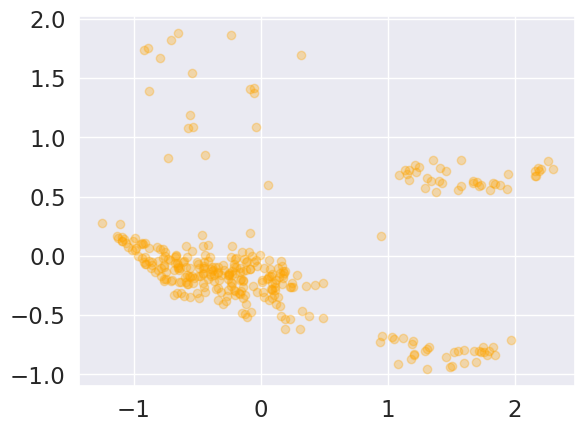

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, alpha=0.3, color='orange')
plt.show()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
df_second = df.copy()
df_second['age2'] = df_second['age'] ** 2
df_second['sobrepeso'] = (df_second['bmi'] > 30).astype(int)
df_second['sobrepeso*fumador'] = df_second['sobrepeso'] * df_second['smoker_yes']


Analizando el segundo modelo

In [ ]:
X_cols = list(set(df_second.columns) - set(['charges']))
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.8797
mse:  0.1202


In [ ]:
model.intercept_ = model.intercept_[0]

model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)

print("==== Summary =====")
stats.summary(model, x_test, y_test, X_cols)

==== Summary =====
Residuals:
    Min     1Q  Median    3Q    Max
-1.9786 0.0648  0.1147 0.141 0.2999


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.003761    0.019096   0.1969  0.844002
children           0.070541    0.019130   3.6875  0.000264
age               -0.031135    0.098280  -0.3168  0.751599
age2               0.351663    0.098924   3.5549  0.000433
bmi                0.052509    0.031164   1.6850  0.092936
region_northwest  -0.009905    0.021695  -0.4566  0.648291
sex_male          -0.003787    0.019183  -0.1974  0.843610
sobrepeso*fumador  0.493509    0.026380  18.7079  0.000000
sobrepeso         -0.030789    0.029711  -1.0363  0.300823
region_southeast  -0.037092    0.023073  -1.6076  0.108874
smoker_yes         0.463544    0.023958  19.3481  0.000000
region_southwest  -0.048413    0.022364  -2.1648  0.031116
---
R-squared:  0.87972,    Adjusted R-squared:  0.87560
F-statistic: 213.44 on 11 features


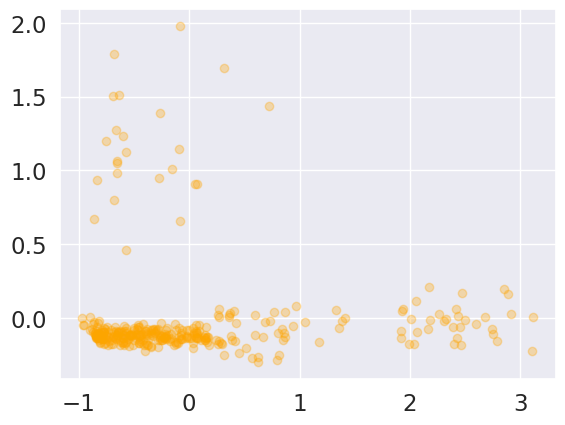

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, alpha=0.3, color='orange')
plt.show()

In [ ]:
X_cols = ['smoker_yes','sobrepeso*fumador', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.8727
mse:  0.135


In [ ]:
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)

print("==== Summary =====")
stats.summary(model, x_test, y_test, X_cols)

==== Summary =====
Residuals:
    Min     1Q  Median     3Q    Max
-1.8133 0.0728  0.1145 0.1395 0.3609


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.020153   0.0000  1.000000
smoker_yes         0.448451    0.026670  16.8148  0.000000
sobrepeso*fumador  0.502195    0.025921  19.3744  0.000000
age2               0.314286    0.019427  16.1780  0.000000
children           0.069696    0.020391   3.4180  0.000709
---
R-squared:  0.87266,    Adjusted R-squared:  0.87111
F-statistic: 561.95 on 4 features


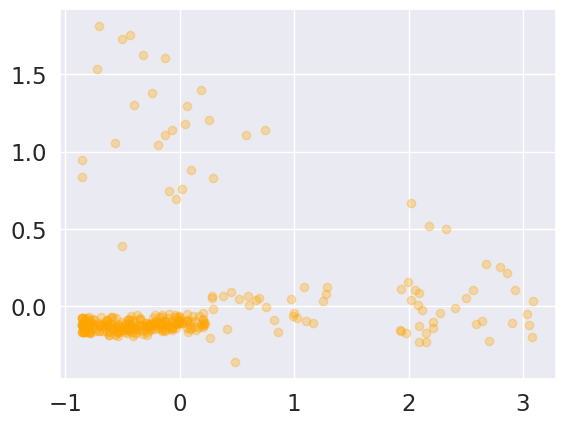

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals, alpha=0.3, color='orange')
plt.show()